In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1TkGHD_Z4lsBqZpTdQKxYpk3f8sG9HU8U')
df


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [11]:
df = df.rename(columns={
'GENDER': 'Gender',
'AGE': 'Age',
'SMOKING': 'Smoking',
'YELLOW_FINGERS': 'YellowFingers',
'ANXIETY': 'Anxiety',
'PEER_PRESSURE': 'PeerPressure',
'CHRONIC DISEASE': 'ChronicDisease',
'FATIGUE ': 'Fatigue',
'ALLERGY ': 'Allergy',
'WHEEZING': 'Wheezing',
'ALCOHOL CONSUMING': 'AlcoholConsuming',
'COUGHING': 'Coughing',
'SHORTNESS OF BREATH': 'ShortnessOfBreath',
'SWALLOWING DIFFICULTY': 'SwallowingDifficulty',
'CHEST PAIN': 'ChestPain',
'LUNG_CANCER': 'LungCancer',
})

In [12]:
df.describe()

,Age,Smoking,YellowFingers,Anxiety,PeerPressure,ChronicDisease,Fatigue,Allergy,Wheezing,AlcoholConsuming,Coughing,ShortnessOfBreath,SwallowingDifficulty,ChestPain
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [13]:
df['ChestPain'].value_counts()

,count
ChestPain,
2,172
1,137


In [14]:
df['LungCancer'].value_counts()


,count
LungCancer,
YES,270
NO,39


In [15]:
df['Smoking'].value_counts()

,count
Smoking,
2,174
1,135


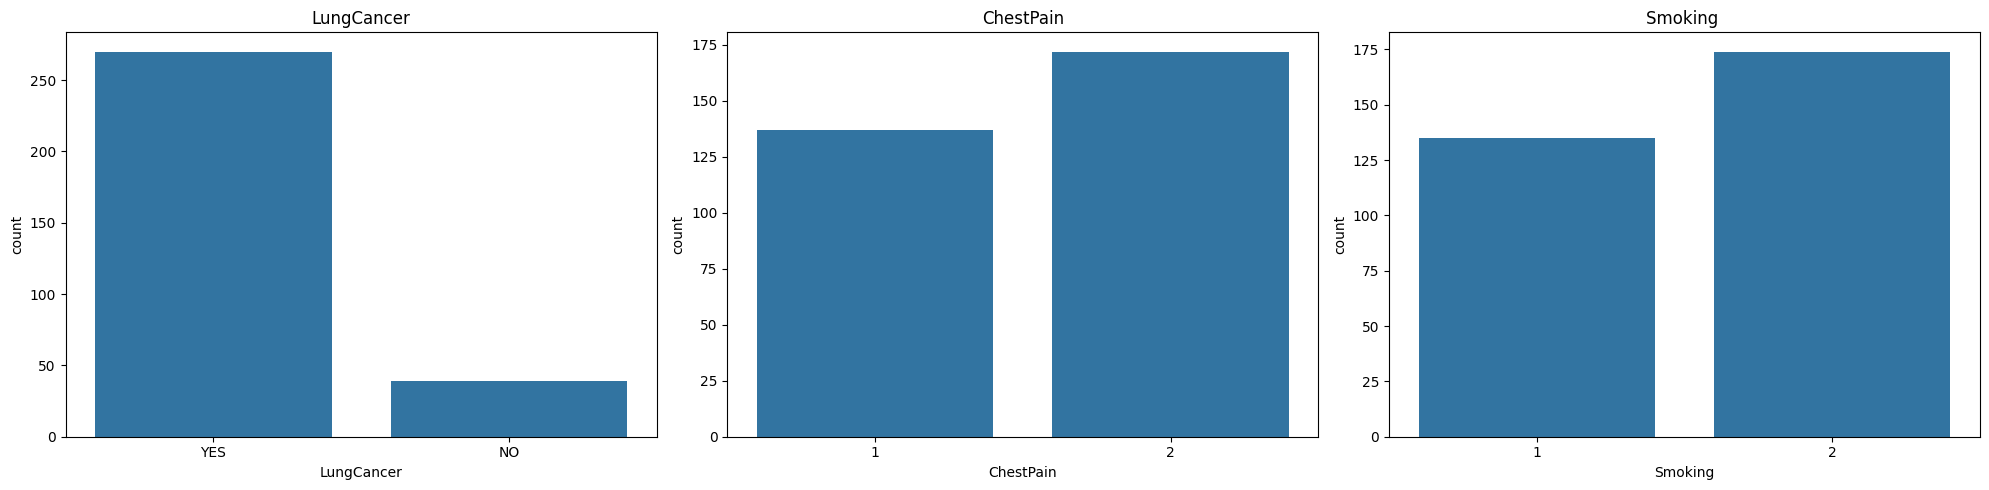

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axes = axes.flatten()
sns.countplot(x= 'LungCancer', data=df, ax=axes[0])
axes [0].set_title('LungCancer')
sns.countplot(x= 'ChestPain', data=df, ax=axes[1])
axes [1].set_title('ChestPain')
sns.countplot(x= 'Smoking', data=df, ax=axes[2])
axes [2].set_title('Smoking ')
plt. tight_layout()
plt. show()

In [17]:
df['LungCancer'] = df['LungCancer'].replace({'YES': 2, 'NO': 1})

/tmp/ipython-input-4260293474.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LungCancer'] = df['LungCancer'].replace({'YES': 2, 'NO': 1})


In [18]:
df['Gender'] = df['Gender'].replace({'F': 1, 'M': 2})

/tmp/ipython-input-1914097601.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'F': 1, 'M': 2})


In [19]:
df.iloc[0:5]

,Gender,Age,Smoking,YellowFingers,Anxiety,PeerPressure,ChronicDisease,Fatigue,Allergy,Wheezing,AlcoholConsuming,Coughing,ShortnessOfBreath,SwallowingDifficulty,ChestPain,LungCancer
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [20]:
X = df.drop(columns=['LungCancer'])
Y = df['LungCancer']

In [21]:
X.head()

,Gender,Age,Smoking,YellowFingers,Anxiety,PeerPressure,ChronicDisease,Fatigue,Allergy,Wheezing,AlcoholConsuming,Coughing,ShortnessOfBreath,SwallowingDifficulty,ChestPain
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [22]:
Y.head()

,LungCancer
0,2
1,2
2,1
3,1
4,1


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(309, 15) (247, 15) (62, 15)


In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [26]:
Y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.8548387096774194

Classification Report:
               precision    recall  f1-score   support

           1       0.44      0.50      0.47         8
           2       0.92      0.91      0.92        54

    accuracy                           0.85        62
   macro avg       0.68      0.70      0.69        62
weighted avg       0.86      0.85      0.86        62


Confusion Matrix:
 [[ 4  4]
 [ 5 49]]


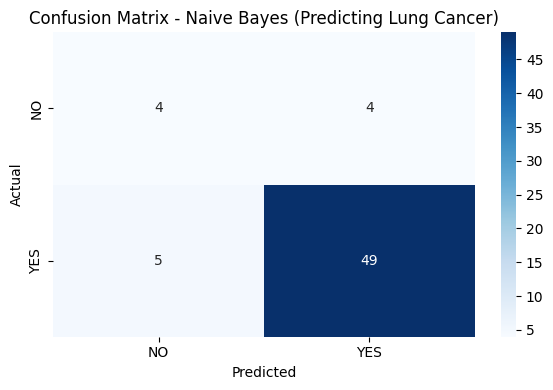

In [27]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
xticklabels=['NO', 'YES'],
yticklabels=['NO', 'YES'])
plt.title("Confusion Matrix - Naive Bayes (Predicting Lung Cancer)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
Y_pred = nb.predict(X_test_scaled)
Y_prob = nb.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [30]:
print("=== Classification Report ===")
print(classification_report(Y_test, Y_pred))
print("\n=== Confusion Matrix ===")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.07      0.25      0.11         8
           2       0.82      0.50      0.62        54

    accuracy                           0.47        62
   macro avg       0.44      0.38      0.36        62
weighted avg       0.72      0.47      0.55        62


=== Confusion Matrix ===
[[ 2  6]
 [27 27]]


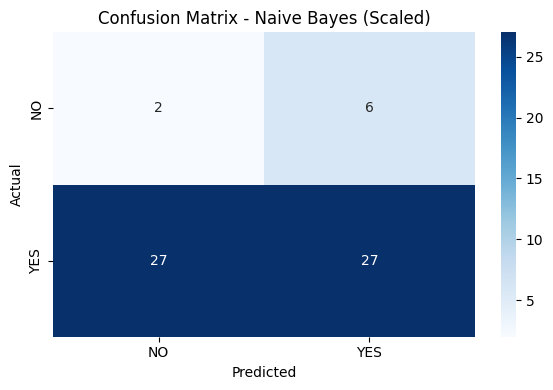

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['NO', 'YES'],
yticklabels=['NO', 'YES'])
plt.title("Confusion Matrix - Naive Bayes (Scaled)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()